# **Numerical Integration.** Newton – Cotes integration formula, Trapezoidal rule, Simpson’s rule, Boole’s rule and Weddle’s rule, Romberg’s Integration. Errors in Quadrature Formulae.

1. Newton-Cotes Quadrature Formula

Example 1: Approximate Integration Using Newton-Cotes Formula

Problem: Evaluate the integral

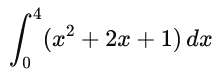

using Newton-Cotes Quadrature Formula with 4 intervals.

In [1]:
import numpy as np

# Function to integrate
def f(x):
    return x**2 + 2*x + 1

# Newton-Cotes Integration
a, b = 0, 4  # Integration limits
n = 4  # Number of intervals
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n  # Step size
I = h * (y[0] + 2 * sum(y[1:-1]) + y[-1]) / 2  # Newton-Cotes formula

print(f"Approximate value of the integral: {I}")


Approximate value of the integral: 42.0


1. Overview: This formula provides a general framework for approximating definite integrals by fitting polynomials to the integrand.
2. Key Idea: The method subdivides the integration interval into smaller segments and applies polynomial approximation over each segment for improved accuracy.

2. Trapezoidal Rule

Example 2: Using the Trapezoidal Rule

Problem: Evaluate

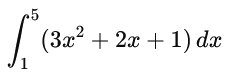

using the Trapezoidal Rule with 4 intervals.

In [2]:
# Function to integrate
def f(x):
    return 3 * x**2 + 2 * x + 1

# Trapezoidal Rule
a, b = 1, 5  # Integration limits
n = 4  # Number of intervals
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n
I = h * (y[0] + 2 * sum(y[1:-1]) + y[-1]) / 2

print(f"Approximate value of the integral using Trapezoidal Rule: {I}")


Approximate value of the integral using Trapezoidal Rule: 154.0


1. Overview: Approximates the area under a curve by dividing it into trapezoids.
2. Key Idea: Computes the integral as the sum of the areas of these trapezoids, providing a simple and effective method for smooth functions.

3. Simpson’s 1/3 Rule

Example 3: Using Simpson’s 1/3 Rule

Problem: Evaluate

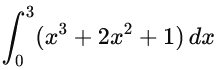

using Simpson’s 1/3 Rule with 6 intervals.

In [3]:
# Function to integrate
def f(x):
    return x**3 + 2 * x**2 + 1

# Simpson's 1/3 Rule
a, b = 0, 3
n = 6  # Must be even
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n
I = h / 3 * (y[0] + 4 * sum(y[1:-1:2]) + 2 * sum(y[2:-2:2]) + y[-1])

print(f"Approximate value of the integral using Simpson's 1/3 Rule: {I}")


Approximate value of the integral using Simpson's 1/3 Rule: 41.25


1. Overview: Fits parabolic arcs to approximate the integral over each segment.
2. Key Idea: This rule is more accurate than the Trapezoidal Rule, especially for functions that can be approximated well by quadratics.

4. Simpson’s 3/8 Rule

Example 4: Using Simpson’s 3/8 Rule

Problem: Evaluate

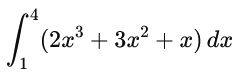

using Simpson’s 3/8 Rule with 6 intervals.

In [4]:
# Function to integrate
def f(x):
    return 2 * x**3 + 3 * x**2 + x

# Simpson's 3/8 Rule
a, b = 1, 4
n = 6  # Must be a multiple of 3
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n
I = 3 * h / 8 * (y[0] + 3 * sum(y[1:-1:3]) + 2 * sum(y[3:-3:3]) + y[-1])

print(f"Approximate value of the integral using Simpson's 3/8 Rule: {I}")


Approximate value of the integral using Simpson's 3/8 Rule: 110.25


1. Overview: Uses cubic polynomials to approximate the integral over intervals that are multiples of three.
2. Key Idea: Provides a higher degree of accuracy compared to Simpson’s 1/3 Rule for certain types of functions.

5. Boole’s Rule

Example 5: Using Boole’s Rule

Problem: Evaluate

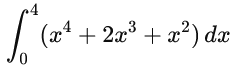

using Boole’s Rule with 8 intervals.

In [5]:
# Function to integrate
def f(x):
    return x**4 + 2 * x**3 + x**2

# Boole's Rule
a, b = 0, 4
n = 8  # Must be a multiple of 4
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n
I = 7 * h / 45 * (7 * (y[0] + y[-1]) + 32 * sum(y[1:-1:4]) + 12 * sum(y[2:-2:4]) + 14 * sum(y[3:-3:4]))

print(f"Approximate value of the integral using Boole's Rule: {I}")


Approximate value of the integral using Boole's Rule: 563.1791666666667


1. Overview: Extends Simpson’s rules by fitting fourth-degree polynomials over intervals that are multiples of four.
2. Key Idea: Offers greater accuracy for smoother functions over larger intervals compared to lower-order methods.

6. Weddle’s Rule

Example 6: Using Weddle’s Rule

Problem: Evaluate

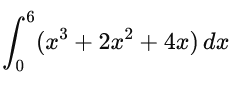

using Weddle’s Rule with 6 intervals.

In [6]:
# Function to integrate
def f(x):
    return x**3 + 2 * x**2 + 4 * x

# Weddle's Rule
a, b = 0, 6
n = 6  # Must be a multiple of 6
x = np.linspace(a, b, n+1)
y = f(x)

h = (b - a) / n
I = 3 * h / 10 * (y[0] + 5 * y[1] + y[2] + 6 * y[3] + y[4] + 5 * y[5] + y[6])

print(f"Approximate value of the integral using Weddle's Rule: {I}")


Approximate value of the integral using Weddle's Rule: 540.0


1. Overview: A specialized quadrature rule designed for six equally spaced intervals.
2. Key Idea: Uses weighted coefficients to provide high accuracy, especially for oscillatory functions.

7. Romberg’s Integration

Example 7: Using Romberg’s Integration

Problem: Evaluate

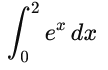

using Romberg’s Integration.

In [7]:
import numpy as np

# Function to integrate
def f(x):
    return np.exp(x)

# Romberg's Integration
def romberg_integration(a, b, n):
    R = np.zeros((n, n))
    h = (b - a)
    R[0, 0] = (h / 2) * (f(a) + f(b))  # First trapezoidal rule

    for i in range(1, n):
        h /= 2
        summation = sum(f(a + (k * h)) for k in range(1, 2**i, 2))
        R[i, 0] = 0.5 * R[i - 1, 0] + h * summation

        # Richardson extrapolation
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4**j - 1)

    return R

# Integration limits and iterations
a, b = 0, 2
n = 4  # Number of rows in Romberg table

R = romberg_integration(a, b, n)
print("Romberg Table:")
print(R)
print(f"Approximate value of the integral: {R[-1, -1]}")


Romberg Table:
[[8.3890561  0.         0.         0.        ]
 [6.91280988 6.4207278  0.         0.        ]
 [6.52161011 6.39121019 6.38924235 0.        ]
 [6.42229782 6.38919373 6.38905929 6.38905639]]
Approximate value of the integral: 6.389056389097693


1. Romberg’s Method: This technique uses successive refinements of the trapezoidal rule combined with Richardson extrapolation for higher accuracy.
2. Romberg Table: Displays results at different levels of accuracy. The value in the bottom-right corner is the most accurate approximation.

8. Errors in Quadrature Formulae

Example 8: Error Estimation for Trapezoidal Rule

Problem: For the integral

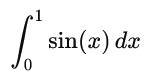

using the Trapezoidal Rule with 4 intervals, estimate the error.

In [8]:
# Error estimation for Trapezoidal Rule
from scipy.integrate import quad
from sympy import symbols, diff, sin

# Define function and its second derivative
x = symbols('x')
f = sin(x)
f_double_prime = diff(f, x, 2)

# Maximum value of |f''(x)| on [0, 1]
f_double_prime_max = max(abs(f_double_prime.evalf(subs={x: xi})) for xi in np.linspace(0, 1, 100))

# Trapezoidal Rule Error
a, b = 0, 1
n = 4
h = (b - a) / n
error = -((b - a) * h**2 / 12) * f_double_prime_max
print(f"Estimated error for the Trapezoidal Rule: {abs(error)}")


Estimated error for the Trapezoidal Rule: 0.00438266137920779


1. Error Formula: The error for the Trapezoidal Rule is proportional to h2h2 and depends on the second derivative of the function.
2. Steps: Compute the second derivative, find its maximum value on the interval, and substitute into the error formula.

Summary for Week 9

    Newton-Cotes Quadrature:
        General framework for approximating integrals.
        Includes Trapezoidal and Simpson’s rules as special cases.

    Trapezoidal Rule:
        Approximates the area under a curve using trapezoids.
        Simple and effective for smooth functions.

    Simpson’s Rules (1/3 and 3/8):
        Use parabolic arcs to approximate the integral for higher accuracy than the Trapezoidal Rule.

    Boole’s and Weddle’s Rules:
        Higher-order methods for accurate integration over larger intervals.

    Romberg’s Integration:
        Combines trapezoidal approximations with Richardson extrapolation for very high accuracy.

    Error Analysis:
        Important for understanding the limitations of numerical integration methods and improving accuracy.